In [361]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder # Data transformation, giving label to categorical data
from sklearn.feature_selection import SelectKBest, chi2 # Chi Square Feature Selection
import matplotlib.pyplot as plt # To plot or make diagram

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Input data

In [362]:
# Reading the titanic dataset use panda
df = pd.read_csv("train.csv")
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [363]:
# show all values in every varible
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [364]:
# Show is there any Null value in every varible
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Merubah nilai Null Age dengan nilai Modulo

In [365]:
# Fill Null data in 'Age' variable with module 
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [366]:
# Show Age's data that has been updated with no null
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [367]:
# Fill 'Embarked' variable with module
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) 

In [368]:
# Erase 'Cabin' Feature
df = df.drop('Cabin', axis=1)

In [369]:
# Show is there any Null value in every variable
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [370]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Feature Engineering

## Label Encoder untuk mengubah data kategorik menjadi numerik

In [371]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [372]:
# Show dataset data that has passed data cleaning process
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


## Feature Selection

In [373]:
# Putting variable target (Survived) to 'y' and variable feature to 'X' 
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
X = df[features]
y = df['Survived']

## Normalisasi Data

In [374]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,24.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [375]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [376]:
# Selecting feature using Chi Square
chi2_selector = SelectKBest(chi2, k='all')
X_kbest = chi2_selector.fit_transform(X,y)

scores = pd.DataFrame({'Feature': X.columns, 'Score': chi2_selector.scores_})
scores = scores.sort_values(by='Score', ascending=False)

print(scores)

    Feature        Score
5      Fare  4518.319091
1       Sex    92.702447
0    Pclass    30.873699
2       Age    15.174021
6  Embarked    10.202525
4     Parch    10.097499
3     SibSp     2.581865


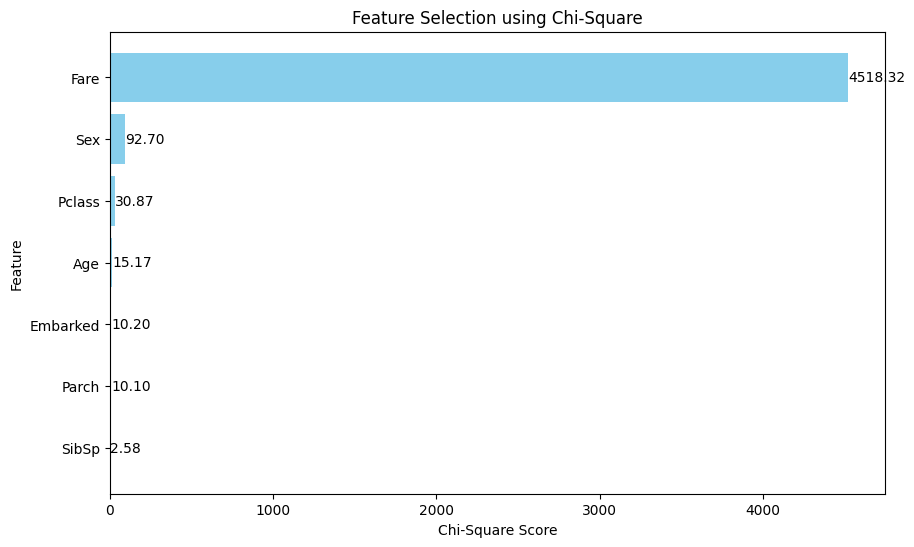

In [377]:
# Plot the bar diagram
plt.figure(figsize=(10, 6))
bars = plt.barh(scores['Feature'], scores['Score'], color='skyblue')
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature')
plt.title('Feature Selection using Chi-Square')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top

# Add the score values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=10)

plt.show()

## Train Test Split, Memisahkan data untuk dilatih dan diuji

In [378]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=42)

# Modeling

## Membangun classification model menggunakan Gradient Boosting Machine

In [379]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state = 42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

# Evaluation

In [380]:
from sklearn.metrics import accuracy_score, confusion_matrix # Fungsi untuk mengeluarkan dan menghitung hasil akurasi

## Prediksi data test menggunakan model Gradient Boosting Classifier yang sudah dibangun

In [381]:
# Prediction Variable
y_pred = model.predict(X_test)

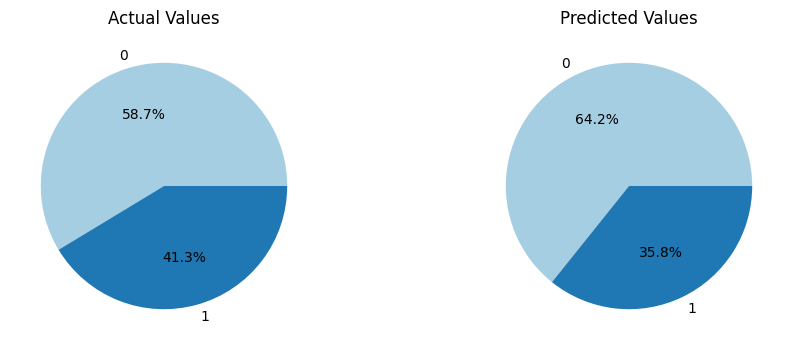

In [382]:
# Assuming y_test and y_pred are already defined
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Count the occurrences of each category/value in 'Actual' and 'Predicted'
actual_counts = df_comparison['Actual'].value_counts()
predicted_counts = df_comparison['Predicted'].value_counts()

# Plot the pie chart for the actual values
plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 1)
plt.pie(actual_counts, labels=actual_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Actual Values')

# Plot the pie chart for the predicted values
plt.subplot(1, 2, 2)
plt.pie(predicted_counts, labels=predicted_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Predicted Values')

plt.show()


## Buat confusion matrix

In [383]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[93 12]
 [22 52]]


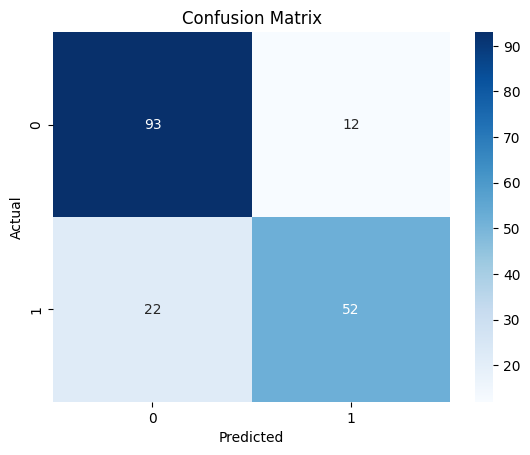

In [384]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hitung akurasi dari prediksi

In [385]:
from sklearn.model_selection import cross_val_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Accuracy: {scores.mean() * 100:.2f}%")

Accuracy: 0.8100558659217877
Accuracy: 81.74%


## Feature importances (khusus random forest)

In [386]:
# feature_importance = model.feature_importances_

# feature_names = X_train.columns

# df_feature_importance = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': feature_importance
# })

# df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
# df_feature_importance